In [5]:
import readgadget
import readfof
import bigfile
import nbodykit
import sys, os
import nbodykit.lab as nb
import readgadget
import numpy as np
import matplotlib.pyplot as pl
from ngp_mass import NGP_mass
import dill
from tqdm import tqdm
import sparse
import MAS_library as MASL
%matplotlib inline
pl.rc('text', usetex=True)
# Palatino
pl.rc('font', family='DejaVu Sans')


In [3]:
isfid = 0
jsim = 1
LH_cosmo_val_file='/mnt/home/spandey/ceph/Quijote/latin_hypercube_params.txt'
if isfid:
    ldir = f'/mnt/home/spandey/ceph/Quijote/data_NGP_self/{jsim}/'
else:
    ldir = f'/mnt/home/spandey/ceph/Quijote/data_NGP_self_LH/{jsim}/'
mass_def = 'vir'
df_z0_fname = ldir + f'SPARSEMATS_halos_HR_rockstar_{mass_def}_lgMmincut_5e12_full_res_128_z=0.0.pk'
df_z0p5_fname = ldir + f'SPARSEMATS_halos_HR_rockstar_{mass_def}_lgMmincut_5e12_full_res_128_z=0.5.pk'
df_z1_fname = ldir + f'SPARSEMATS_halos_HR_rockstar_{mass_def}_lgMmincut_5e12_full_res_128_z=1.0.pk'

df_z0 = dill.load(open(df_z0_fname, 'rb'))
df_z0p5 = dill.load(open(df_z0p5_fname, 'rb'))
df_z1 = dill.load(open(df_z1_fname, 'rb'))



In [49]:
# saved_halos_full = {
#     'N_halos_combined': Nhalos,
#     'M_halos_combined': M_halos,
#     'nu_halos_combined': nu_halos,
#     'conc_halos_combined': conc_halos,
#     'v_halos_true_combined': dfhalo_ngp_wvall_true,
#     'v_halos_pred_combined': dfhalo_ngp_wvall_pred,
#     'v_halos_diff_combined': dfhalo_ngp_wvall_diff
#     } 

Nhalos_z0 = df_z0['N_halos_combined'].todense()
Nhalos_z0p5 = df_z0p5['N_halos_combined'].todense()
Nhalos_z1 = df_z1['N_halos_combined'].todense()

M_halos_z0 = df_z0['M_halos_combined'].todense()
M_halos_z0p5 = df_z0p5['M_halos_combined'].todense()
M_halos_z1 = df_z1['M_halos_combined'].todense()

nu_halos_z0 = df_z0['nu_halos_combined'].todense()
nu_halos_z0p5 = df_z0p5['nu_halos_combined'].todense()
nu_halos_z1 = df_z1['nu_halos_combined'].todense()


In [50]:
z_snap_sel = [0, 0.5, 1]
nu_snap_sel_dict = {0: nu_halos_z0, 0.5: nu_halos_z0p5, 1: nu_halos_z1}
Nhalos_snap_sel_dict = {0: Nhalos_z0, 0.5: Nhalos_z0p5, 1: Nhalos_z1}
Mhalos_snap_sel_dict = {0: M_halos_z0, 0.5: M_halos_z0p5, 1: M_halos_z1}


In [51]:
# from colossus.lss import mass_function
# from colossus.lss import peaks
# # lgM_array = np.linspace(12.5, 16.0, 1000)
# # M_array = 10**lgM_array
# z_inference = 0.0
# # nu_array_theory = np.l
# nu_array_theory = np.linspace(1, 5.0, 40)[1:-1]
# M_array = peaks.massFromPeakHeight(bin_cents_nu, z_inference)
# # hmf_dndlnM = mass_function.massFunction(M_array, float(z_inference), mdef = 'vir', model = 'tinker08', q_out = 'dndlnM')    
# hmf_nu_theory = mass_function.massFunction(M_array, float(z_inference), mdef = 'vir', model = 'tinker08', q_out = 'f')
# nu_array_theory = peaks.peakHeight(M_array, float(z_inference))
# hmf_nu_theory = hmf_nu_theory/M_array
# hmf_nu_theory = hmf_nu_theory/hmf_nu_theory.sum()


In [52]:
# pl.figure()
# pl.plot(nu_array_theory, hmf_nu_theory, label='Colossus')
# pl.yscale('log')


In [53]:
# from colossus.lss import peaks
# from colossus.cosmology import cosmology

# if isfid:
#     cosmo_val_all = np.array([0.3175, 0.049, 0.6711, 0.9624, 0.834])
# else:
#     cosmo_val_all = np.loadtxt(LH_cosmo_val_file)[jsim]
# Om0 = cosmo_val_all[0]
# Ob0 = cosmo_val_all[1]
# h0 = cosmo_val_all[2]
# ns = cosmo_val_all[3]
# sigma8 = cosmo_val_all[4]
# params = {'flat': True, 'H0': h0*100, 'Om0': Om0, 'Ob0': Ob0, 'sigma8': sigma8, 'ns': ns}
# cosmo = cosmology.setCosmology('myCosmo', **params)


# bin_cents_nu = np.linspace(1, 5.0, 40)[1:-1]
# # bin_cents_nu = np.linspace(0.0, 2.0, 40)[1:-1]
# bin_edges_nu = 0.5*(bin_cents_nu[1:] + bin_cents_nu[:-1])
# delta_b = 0.5*(bin_cents_nu[1] - bin_cents_nu[0])
# bin_edges_nu = np.insert(bin_edges_nu,0, bin_cents_nu[0] - delta_b)
# bin_edges_nu = np.insert(bin_edges_nu,len(bin_edges_nu), bin_cents_nu[-1] + delta_b)

# import matplotlib
# fig, axes = pl.subplots(1,1, figsize=(7,5))
# from matplotlib import cm
# norm = matplotlib.colors.Normalize(vmin=0.0, vmax=1.0)

# for jz in range(len(z_snap_sel)):
#     # z = np.round(z_snap_sel[jz], 4)
#     z = z_snap_sel[jz]
#     # z_REDSHIFT = str(z)
#     # saved_jz = saved_all_snaps[z_REDSHIFT]

#     Nhalos = Nhalos_snap_sel_dict[z]
#     M_halos = Mhalos_snap_sel_dict[z][...]
#     nu_halos = nu_snap_sel_dict[z][...]

#     M_halos_all_nonzero = M_halos[M_halos > 0]
#     nu_all_nonzero = nu_halos[M_halos > 0]
    
#     z_jz = z_snap_sel[jz]
#     color_ji = cm.jet(norm(z_jz)) 

#     hist_truth, _ = np.histogram(nu_all_nonzero, bins=bin_edges_nu, density=True)
#     hist_truth = hist_truth/np.sum(hist_truth)
#     mass_from_nu = peaks.massFromPeakHeight(bin_cents_nu, z)
#     # hist_mock, _ = np.histogram(lgMass_mock, bins=bin_edges_M)
#     # pl.plot(bin_cents_M, hist_mock/hist_truth, color=color_ji, alpha=0.5)
#     # pl.plot(bin_cents_nu, mass_from_nu*hist_truth, color=color_ji, ls='', marker='s', alpha=0.5)
#     pl.plot(bin_cents_nu, hist_truth, color=color_ji, ls='', marker='s', alpha=0.5)
#     # pl.plot(bin_cents_M, hist_mock, color=color_ji, ls = '-', alpha=0.5)

# pl.plot(nu_array_theory-0.2, hmf_nu_theory, label='Colossus1')
# pl.plot(nu_array_theory+0.15, hmf_nu_theory, label='Colossus2')
# pl.plot(nu_array_theory+0.5, hmf_nu_theory, label='Colossus3')
# # pl.ylim(0.6, 1.4)
# pl.yscale('log')
# cbar = fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cm.jet), ax=axes, label=r'$z$', pad=0.01)
# # set labelsize and colorbar location:
# # cbar = ax.collections[0].colorbar
# cbar.ax.tick_params(labelsize=15)
# # cbar.set_label(r'$\sigma_8$', size=18)
# cbar.set_label(r'$z$', size=20)
# cbar.set_ticks(np.arange(0.0, 1.01, 0.5))
# # pl.xlabel(r'$\log_{10}(M_{\rm halo}/M_{\odot})$', fontsize=18)
# pl.xlabel(r'$\nu(M)$', fontsize=18)
# # pl.ylabel(r'$M_1(\nu)$ $\times$ $f_1(\nu)$', fontsize=18)
# pl.ylabel(r'$M(\nu)$ $\times$ Histogram$(\nu)$', fontsize=18)
# # pl.axhline(1, color='k', ls='--')
# pl.tick_params(axis='both', which='major', labelsize=16)
# pl.tick_params(axis='both', which='minor', labelsize=16)





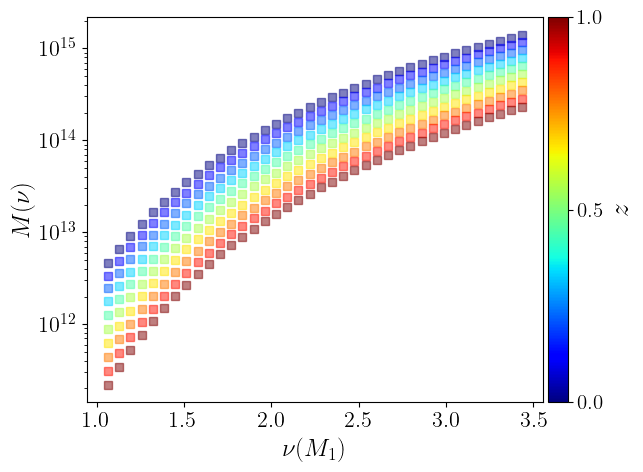

In [11]:
from colossus.lss import peaks
from colossus.cosmology import cosmology
if isfid:
    cosmo_val_all = np.array([0.3175, 0.049, 0.6711, 0.9624, 0.834])
else:
    cosmo_val_all = np.loadtxt(LH_cosmo_val_file)[jsim]
Om0 = cosmo_val_all[0]
Ob0 = cosmo_val_all[1]
h0 = cosmo_val_all[2]
ns = cosmo_val_all[3]
sigma8 = cosmo_val_all[4]
params = {'flat': True, 'H0': h0*100, 'Om0': Om0, 'Ob0': Ob0, 'sigma8': sigma8, 'ns': ns}
cosmo = cosmology.setCosmology('myCosmo', **params)

bin_cents_nu = np.linspace(1.0, 3.5, 40)[1:-1]
# bin_cents_nu = np.linspace(0.0, 2.0, 40)[1:-1]
bin_edges_nu = 0.5*(bin_cents_nu[1:] + bin_cents_nu[:-1])
delta_b = 0.5*(bin_cents_nu[1] - bin_cents_nu[0])
bin_edges_nu = np.insert(bin_edges_nu,0, bin_cents_nu[0] - delta_b)
bin_edges_nu = np.insert(bin_edges_nu,len(bin_edges_nu), bin_cents_nu[-1] + delta_b)

z_snap_sel = np.linspace(0, 1, 10)

import matplotlib
fig, axes = pl.subplots(1,1, figsize=(7,5))
from matplotlib import cm
norm = matplotlib.colors.Normalize(vmin=0.0, vmax=1.0)

for jz in range(len(z_snap_sel)):
    # z = np.round(z_snap_sel[jz], 4)
    z = z_snap_sel[jz]
    z_jz = z_snap_sel[jz]
    color_ji = cm.jet(norm(z_jz)) 

    # hist_truth, _ = np.histogram(nu_all_nonzero, bins=bin_edges_nu, density=True)
    mass_from_nu = peaks.massFromPeakHeight(bin_cents_nu, z)
    pl.plot(bin_cents_nu, mass_from_nu, color=color_ji, ls='', marker='s', alpha=0.5)

pl.yscale('log')
cbar = fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cm.jet), ax=axes, label=r'$z$', pad=0.01)
# set labelsize and colorbar location:
# cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=15)
# cbar.set_label(r'$\sigma_8$', size=18)
cbar.set_label(r'$z$', size=20)
cbar.set_ticks(np.arange(0.0, 1.01, 0.5))
# pl.xlabel(r'$\log_{10}(M_{\rm halo}/M_{\odot})$', fontsize=18)
pl.xlabel(r'$\nu(M_1)$', fontsize=18)
# pl.ylabel(r'$M_1(\nu)$ $\times$ $f_1(\nu)$', fontsize=18)
# pl.ylabel(r'$M(\nu)$ $\times$ Histogram$(\nu)$', fontsize=18)
pl.ylabel(r'$M({\nu})$', fontsize=18)
# pl.axhline(1, color='k', ls='--')
pl.tick_params(axis='both', which='major', labelsize=16)
pl.tick_params(axis='both', which='minor', labelsize=16)





In [8]:
bin_cents_nu


array([-0.10512821, -0.01025641,  0.08461538,  0.17948718,  0.27435897,
        0.36923077,  0.46410256,  0.55897436,  0.65384615,  0.74871795,
        0.84358974,  0.93846154,  1.03333333,  1.12820513,  1.22307692,
        1.31794872,  1.41282051,  1.50769231,  1.6025641 ,  1.6974359 ,
        1.79230769,  1.88717949,  1.98205128,  2.07692308,  2.17179487,
        2.26666667,  2.36153846,  2.45641026,  2.55128205,  2.64615385,
        2.74102564,  2.83589744,  2.93076923,  3.02564103,  3.12051282,
        3.21538462,  3.31025641,  3.40512821])

In [6]:
cosmo_val_all = np.array([0.3175, 0.049, 0.6711, 0.9624, 0.834])
Om0 = cosmo_val_all[0]
Ob0 = cosmo_val_all[1]
h0 = cosmo_val_all[2]
ns = cosmo_val_all[3]
sigma8 = cosmo_val_all[4]
params = {'flat': True, 'H0': h0*100, 'Om0': Om0, 'Ob0': Ob0, 'sigma8': sigma8, 'ns': ns}
cosmo_fid = cosmology.setCosmology('myCosmo', **params)
# Dz_fid = cosmo_fid.growthFactor(1.0)


NameError: name 'cosmology' is not defined

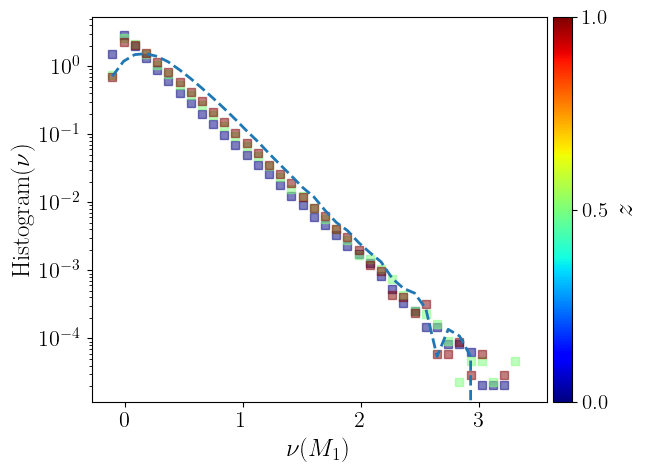

In [56]:
from colossus.lss import peaks
from colossus.cosmology import cosmology
if isfid:
    cosmo_val_all = np.array([0.3175, 0.049, 0.6711, 0.9624, 0.834])
else:
    cosmo_val_all = np.loadtxt(LH_cosmo_val_file)[jsim]
Om0 = cosmo_val_all[0]
Ob0 = cosmo_val_all[1]
h0 = cosmo_val_all[2]
ns = cosmo_val_all[3]
sigma8 = cosmo_val_all[4]
params = {'flat': True, 'H0': h0*100, 'Om0': Om0, 'Ob0': Ob0, 'sigma8': sigma8, 'ns': ns}
cosmo = cosmology.setCosmology('myCosmo', **params)


bin_cents_nu = np.linspace(-0.2, 3.5, 40)[1:-1]
# bin_cents_nu = np.linspace(0.0, 2.0, 40)[1:-1]
bin_edges_nu = 0.5*(bin_cents_nu[1:] + bin_cents_nu[:-1])
delta_b = 0.5*(bin_cents_nu[1] - bin_cents_nu[0])
bin_edges_nu = np.insert(bin_edges_nu,0, bin_cents_nu[0] - delta_b)
bin_edges_nu = np.insert(bin_edges_nu,len(bin_edges_nu), bin_cents_nu[-1] + delta_b)

mu, beta = 0.15, 0.245
rs = np.random.gumbel(mu, beta, 400000)

hist_rand, _ = np.histogram(rs, bins=bin_edges_nu, density=True)
# hist_rand = hist_rand/np.sum(hist_rand)


import matplotlib
fig, axes = pl.subplots(1,1, figsize=(7,5))
from matplotlib import cm
norm = matplotlib.colors.Normalize(vmin=0.0, vmax=1.0)

for jz in range(len(z_snap_sel)):
    # z = np.round(z_snap_sel[jz], 4)
    z = z_snap_sel[jz]
    # z_REDSHIFT = str(z)
    # saved_jz = saved_all_snaps[z_REDSHIFT]
    Dz = cosmo.growthFactor(z)
    Nhalos = Nhalos_snap_sel_dict[z]    
    M_halos = Mhalos_snap_sel_dict[z][...,0]
    nu_halos = nu_snap_sel_dict[z][...,0]

    M_halos_all_nonzero = M_halos[M_halos > 0]
    # nu_all_nonzero = nu_halos[M_halos > 0] - 1/Dz
    nu_all_nonzero = nu_halos[M_halos > 0] - 1/cosmo_fid.growthFactor(z)
    
    z_jz = z_snap_sel[jz]
    color_ji = cm.jet(norm(z_jz)) 

    hist_truth, _ = np.histogram(nu_all_nonzero, bins=bin_edges_nu, density=True)
    # mass_from_nu = peaks.massFromPeakHeight(bin_cents_nu, z)
    # hist_truth = hist_truth/np.sum(hist_truth)
    # hist_mock, _ = np.histogram(lgMass_mock, bins=bin_edges_M)
    # pl.plot(bin_cents_M, hist_mock/hist_truth, color=color_ji, alpha=0.5)
    # pl.plot(bin_cents_nu, mass_from_nu*hist_truth, color=color_ji, ls='', marker='s', alpha=0.5)
    pl.plot(bin_cents_nu, hist_truth, color=color_ji, ls='', marker='s', alpha=0.5)
    # pl.plot(bin_cents_M, hist_mock, color=color_ji, ls = '-', alpha=0.5)

pl.plot(bin_cents_nu, hist_rand, ls='--', lw=2.0, label='Gumbel')

# pl.plot(nu_array_theory-0.1, hmf_nu_theory, label='Colossus1')
# pl.plot(nu_array_theory+0.2, hmf_nu_theory, label='Colossus2')
# pl.plot(nu_array_theory+0.6, hmf_nu_theory, label='Colossus3')
# pl.ylim(0.6, 1.4)
pl.yscale('log')
cbar = fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cm.jet), ax=axes, label=r'$z$', pad=0.01)
# set labelsize and colorbar location:
# cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=15)
# cbar.set_label(r'$\sigma_8$', size=18)
cbar.set_label(r'$z$', size=20)
cbar.set_ticks(np.arange(0.0, 1.01, 0.5))
# pl.xlabel(r'$\log_{10}(M_{\rm halo}/M_{\odot})$', fontsize=18)
pl.xlabel(r'$\nu(M_1)$', fontsize=18)
# pl.ylabel(r'$M_1(\nu)$ $\times$ $f_1(\nu)$', fontsize=18)
# pl.ylabel(r'$M(\nu)$ $\times$ Histogram$(\nu)$', fontsize=18)
pl.ylabel(r'Histogram$(\nu)$', fontsize=18)
# pl.axhline(1, color='k', ls='--')
pl.tick_params(axis='both', which='major', labelsize=16)
pl.tick_params(axis='both', which='minor', labelsize=16)





In [8]:
# 1/Dz
# Dz

array(0.66878876)

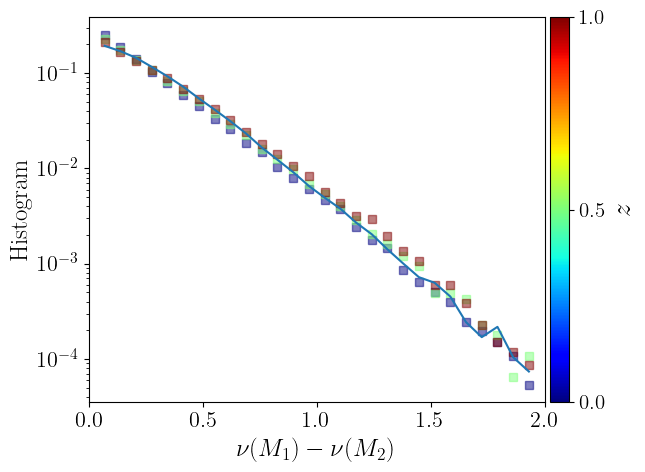

In [60]:
from colossus.lss import peaks
from colossus.cosmology import cosmology
cosmo_val_all = np.array([0.3175, 0.049, 0.6711, 0.9624, 0.834])
Om0 = cosmo_val_all[0]
Ob0 = cosmo_val_all[1]
h0 = cosmo_val_all[2]
ns = cosmo_val_all[3]
sigma8 = cosmo_val_all[4]
params = {'flat': True, 'H0': h0*100, 'Om0': Om0, 'Ob0': Ob0, 'sigma8': sigma8, 'ns': ns}
cosmo = cosmology.setCosmology('myCosmo', **params)


bin_cents_nu = np.linspace(0.0, 2.0, 30)[1:-1]
# bin_cents_nu = np.linspace(0.0, 2.0, 40)[1:-1]
bin_edges_nu = 0.5*(bin_cents_nu[1:] + bin_cents_nu[:-1])
delta_b = 0.5*(bin_cents_nu[1] - bin_cents_nu[0])
bin_edges_nu = np.insert(bin_edges_nu,0, bin_cents_nu[0] - delta_b)
bin_edges_nu = np.insert(bin_edges_nu,len(bin_edges_nu), bin_cents_nu[-1] + delta_b)

mu, beta = 0, 0.22
rs = np.random.gumbel(mu, beta, 400000)

hist_rand, _ = np.histogram(rs, bins=bin_edges_nu)
hist_rand = hist_rand/np.sum(hist_rand)

import matplotlib
fig, axes = pl.subplots(1,1, figsize=(7,5))
from matplotlib import cm
norm = matplotlib.colors.Normalize(vmin=0.0, vmax=1.0)

for jz in range(len(z_snap_sel)):
    # z = np.round(z_snap_sel[jz], 4)
    z = z_snap_sel[jz]
    # z_REDSHIFT = str(z)
    # saved_jz = saved_all_snaps[z_REDSHIFT]

    Nhalos = Nhalos_snap_sel_dict[z]
    indsel = np.where(Nhalos > 1)

    M_halos_0 = Mhalos_snap_sel_dict[z][...,0][indsel]
    nu_halos_0 = nu_snap_sel_dict[z][...,0][indsel]

    M_halos_1 = Mhalos_snap_sel_dict[z][...,1][indsel]
    nu_halos_1 = nu_snap_sel_dict[z][...,1][indsel]

    nu_halos_diff = nu_halos_0 - nu_halos_1

    # M_halos_all_nonzero = M_halos[M_halos > 0]
    # nu_all_nonzero = nu_halos[M_halos > 0]
    
    z_jz = z_snap_sel[jz]
    color_ji = cm.jet(norm(z_jz)) 

    hist_truth, _ = np.histogram(nu_halos_diff, bins=bin_edges_nu)
    hist_truth = hist_truth/np.sum(hist_truth)
    # mass_from_nu = peaks.massFromPeakHeight(bin_cents_nu, z)
    # hist_mock, _ = np.histogram(lgMass_mock, bins=bin_edges_M)
    # pl.plot(bin_cents_M, hist_mock/hist_truth, color=color_ji, alpha=0.5)
    # pl.plot(bin_cents_nu, mass_from_nu*hist_truth, color=color_ji, ls='', marker='s', alpha=0.5)
    pl.plot(bin_cents_nu, hist_truth, color=color_ji, ls='', marker='s', alpha=0.5)    
    # pl.plot(bin_cents_M, hist_mock, color=color_ji, ls = '-', alpha=0.5)
pl.plot(bin_cents_nu, hist_rand, label='Gumbel')
# pl.ylim(0.6, 1.4)
pl.yscale('log')
pl.xlim(0, 2)
cbar = fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cm.jet), ax=axes, label=r'$z$', pad=0.01)
# set labelsize and colorbar location:
# cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=15)
# cbar.set_label(r'$\sigma_8$', size=18)
cbar.set_label(r'$z$', size=20)
cbar.set_ticks(np.arange(0.0, 1.01, 0.5))
# pl.xlabel(r'$\log_{10}(M_{\rm halo}/M_{\odot})$', fontsize=18)
# pl.xlabel(r'$\nu$', fontsize=18)
pl.xlabel(r'$\nu(M_1) - \nu(M_2)$', fontsize=18)
# pl.ylabel(r'$f(\nu(M_1) - \nu(M_2))$', fontsize=18)
# pl.ylabel(r'$f(\nu(M_1) - \nu(M_2))$', fontsize=18)
pl.ylabel(r'Histogram', fontsize=18)
# pl.axhline(1, color='k', ls='--')
pl.tick_params(axis='both', which='major', labelsize=16)
pl.tick_params(axis='both', which='minor', labelsize=16)





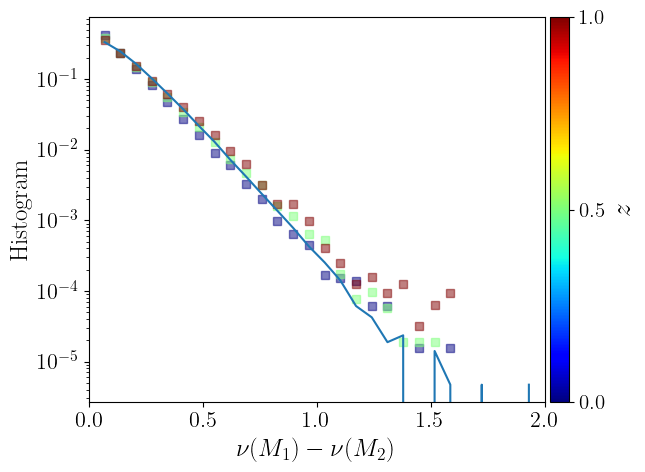

In [59]:
from colossus.lss import peaks
from colossus.cosmology import cosmology
cosmo_val_all = np.array([0.3175, 0.049, 0.6711, 0.9624, 0.834])
Om0 = cosmo_val_all[0]
Ob0 = cosmo_val_all[1]
h0 = cosmo_val_all[2]
ns = cosmo_val_all[3]
sigma8 = cosmo_val_all[4]
params = {'flat': True, 'H0': h0*100, 'Om0': Om0, 'Ob0': Ob0, 'sigma8': sigma8, 'ns': ns}
cosmo = cosmology.setCosmology('myCosmo', **params)


bin_cents_nu = np.linspace(0.0, 2.0, 30)[1:-1]
# bin_cents_nu = np.linspace(0.0, 2.0, 40)[1:-1]
bin_edges_nu = 0.5*(bin_cents_nu[1:] + bin_cents_nu[:-1])
delta_b = 0.5*(bin_cents_nu[1] - bin_cents_nu[0])
bin_edges_nu = np.insert(bin_edges_nu,0, bin_cents_nu[0] - delta_b)
bin_edges_nu = np.insert(bin_edges_nu,len(bin_edges_nu), bin_cents_nu[-1] + delta_b)

mu, beta = 0, 0.125
rs = np.random.gumbel(mu, beta, 400000)

hist_rand, _ = np.histogram(rs, bins=bin_edges_nu)
hist_rand = hist_rand/np.sum(hist_rand)


import matplotlib
fig, axes = pl.subplots(1,1, figsize=(7,5))
from matplotlib import cm
norm = matplotlib.colors.Normalize(vmin=0.0, vmax=1.0)

for jz in range(len(z_snap_sel)):
    # z = np.round(z_snap_sel[jz], 4)
    z = z_snap_sel[jz]
    # z_REDSHIFT = str(z)
    # saved_jz = saved_all_snaps[z_REDSHIFT]

    Nhalos = Nhalos_snap_sel_dict[z]
    indsel = np.where(Nhalos > 2)

    M_halos_0 = Mhalos_snap_sel_dict[z][...,1][indsel]
    nu_halos_0 = nu_snap_sel_dict[z][...,1][indsel]

    M_halos_1 = Mhalos_snap_sel_dict[z][...,2][indsel]
    nu_halos_1 = nu_snap_sel_dict[z][...,2][indsel]

    nu_halos_diff = nu_halos_0 - nu_halos_1

    # M_halos_all_nonzero = M_halos[M_halos > 0]
    # nu_all_nonzero = nu_halos[M_halos > 0]
    
    z_jz = z_snap_sel[jz]
    color_ji = cm.jet(norm(z_jz)) 

    hist_truth, _ = np.histogram(nu_halos_diff, bins=bin_edges_nu)
    hist_truth = hist_truth/np.sum(hist_truth)
    # mass_from_nu = peaks.massFromPeakHeight(bin_cents_nu, z)
    # hist_mock, _ = np.histogram(lgMass_mock, bins=bin_edges_M)
    # pl.plot(bin_cents_M, hist_mock/hist_truth, color=color_ji, alpha=0.5)
    # pl.plot(bin_cents_nu, mass_from_nu*hist_truth, color=color_ji, ls='', marker='s', alpha=0.5)
    pl.plot(bin_cents_nu, hist_truth, color=color_ji, ls='', marker='s', alpha=0.5)    
    # pl.plot(bin_cents_M, hist_mock, color=color_ji, ls = '-', alpha=0.5)
# pl.plot(nu_array_theory-1.2, hmf_nu_theory, label='Colossus1')
pl.plot(bin_cents_nu, hist_rand, label='Gumbel')
# pl.ylim(0.6, 1.4)
pl.yscale('log')
pl.xlim(0, 2)
cbar = fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cm.jet), ax=axes, label=r'$z$', pad=0.01)
# set labelsize and colorbar location:
# cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=15)
# cbar.set_label(r'$\sigma_8$', size=18)
cbar.set_label(r'$z$', size=20)
cbar.set_ticks(np.arange(0.0, 1.01, 0.5))
# pl.xlabel(r'$\log_{10}(M_{\rm halo}/M_{\odot})$', fontsize=18)
# pl.xlabel(r'$\nu$', fontsize=18)
pl.xlabel(r'$\nu(M_1) - \nu(M_2)$', fontsize=18)
# pl.ylabel(r'$f(\nu(M_1) - \nu(M_2))$', fontsize=18)
# pl.ylabel(r'$f(\nu(M_1) - \nu(M_2))$', fontsize=18)
pl.ylabel(r'Histogram', fontsize=18)
# pl.axhline(1, color='k', ls='--')
pl.tick_params(axis='both', which='major', labelsize=16)
pl.tick_params(axis='both', which='minor', labelsize=16)





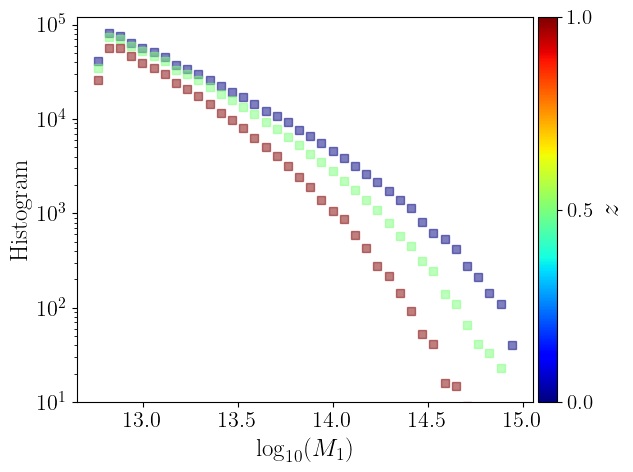

In [89]:
from colossus.lss import peaks
from colossus.cosmology import cosmology
cosmo_val_all = np.array([0.3175, 0.049, 0.6711, 0.9624, 0.834])
Om0 = cosmo_val_all[0]
Ob0 = cosmo_val_all[1]
h0 = cosmo_val_all[2]
ns = cosmo_val_all[3]
sigma8 = cosmo_val_all[4]
params = {'flat': True, 'H0': h0*100, 'Om0': Om0, 'Ob0': Ob0, 'sigma8': sigma8, 'ns': ns}
cosmo = cosmology.setCosmology('myCosmo', **params)


bin_cents_M = np.linspace(12.7, 15.0, 40)[1:-1]
# bin_cents_nu = np.linspace(0.0, 2.0, 40)[1:-1]
bin_edges_M = 0.5*(bin_cents_M[1:] + bin_cents_M[:-1])
delta_b = 0.5*(bin_cents_M[1] - bin_cents_M[0])
bin_edges_M = np.insert(bin_edges_M,0, bin_edges_M[0] - delta_b)
bin_edges_M = np.insert(bin_edges_M,len(bin_edges_M), bin_edges_M[-1] + delta_b)

import matplotlib
fig, axes = pl.subplots(1,1, figsize=(7,5))
from matplotlib import cm
norm = matplotlib.colors.Normalize(vmin=0.0, vmax=1.0)

for jz in range(len(z_snap_sel)):
    # z = np.round(z_snap_sel[jz], 4)
    z = z_snap_sel[jz]
    # z_REDSHIFT = str(z)
    # saved_jz = saved_all_snaps[z_REDSHIFT]

    Nhalos = Nhalos_snap_sel_dict[z]
    M_halos = Mhalos_snap_sel_dict[z][...]
    nu_halos = nu_snap_sel_dict[z][...]

    M_halos_all_nonzero = M_halos[M_halos > 0]
    nu_all_nonzero = nu_halos[M_halos > 0]
    
    z_jz = z_snap_sel[jz]
    color_ji = cm.jet(norm(z_jz)) 

    hist_truth, _ = np.histogram(M_halos_all_nonzero, bins=bin_edges_M)
    # mass_from_nu = peaks.massFromPeakHeight(bin_cents_nu, z)
    # hist_mock, _ = np.histogram(lgMass_mock, bins=bin_edges_M)
    # pl.plot(bin_cents_M, hist_mock/hist_truth, color=color_ji, alpha=0.5)
    pl.plot(bin_cents_M, hist_truth, color=color_ji, ls='', marker='s', alpha=0.5)
    # pl.plot(bin_cents_M, hist_mock, color=color_ji, ls = '-', alpha=0.5)

# pl.ylim(0.6, 1.4)
pl.yscale('log')
cbar = fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cm.jet), ax=axes, label=r'$z$', pad=0.01)
# set labelsize and colorbar location:
# cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=15)
# cbar.set_label(r'$\sigma_8$', size=18)
cbar.set_label(r'$z$', size=20)
cbar.set_ticks(np.arange(0.0, 1.01, 0.5))
# pl.xlabel(r'$\log_{10}(M_{\rm halo}/M_{\odot})$', fontsize=18)
pl.xlabel(r'$\log_{10}(M_1)$', fontsize=18)
pl.ylim(10, 1.2e5)
# pl.ylabel(r'$f(M_0)$', fontsize=18)
pl.ylabel(r'Histogram', fontsize=18)
# pl.axhline(1, color='k', ls='--')
pl.tick_params(axis='both', which='major', labelsize=16)
pl.tick_params(axis='both', which='minor', labelsize=16)





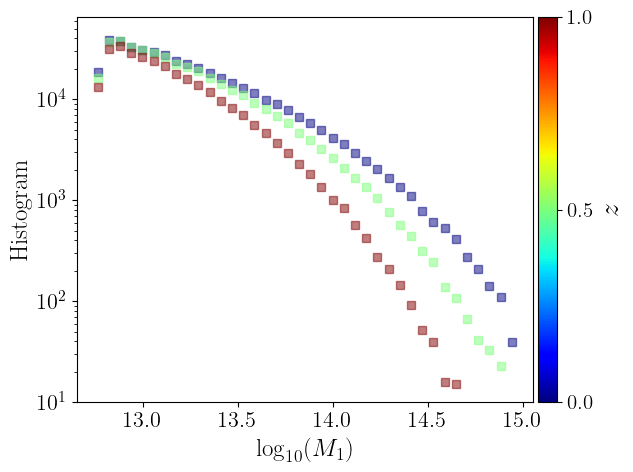

In [90]:
from colossus.lss import peaks
from colossus.cosmology import cosmology
cosmo_val_all = np.array([0.3175, 0.049, 0.6711, 0.9624, 0.834])
Om0 = cosmo_val_all[0]
Ob0 = cosmo_val_all[1]
h0 = cosmo_val_all[2]
ns = cosmo_val_all[3]
sigma8 = cosmo_val_all[4]
params = {'flat': True, 'H0': h0*100, 'Om0': Om0, 'Ob0': Ob0, 'sigma8': sigma8, 'ns': ns}
cosmo = cosmology.setCosmology('myCosmo', **params)


bin_cents_M = np.linspace(12.7, 15.0, 40)[1:-1]
# bin_cents_nu = np.linspace(0.0, 2.0, 40)[1:-1]
bin_edges_M = 0.5*(bin_cents_M[1:] + bin_cents_M[:-1])
delta_b = 0.5*(bin_cents_M[1] - bin_cents_M[0])
bin_edges_M = np.insert(bin_edges_M,0, bin_edges_M[0] - delta_b)
bin_edges_M = np.insert(bin_edges_M,len(bin_edges_M), bin_edges_M[-1] + delta_b)

import matplotlib
fig, axes = pl.subplots(1,1, figsize=(7,5))
from matplotlib import cm
norm = matplotlib.colors.Normalize(vmin=0.0, vmax=1.0)

for jz in range(len(z_snap_sel)):
    # z = np.round(z_snap_sel[jz], 4)
    z = z_snap_sel[jz]
    # z_REDSHIFT = str(z)
    # saved_jz = saved_all_snaps[z_REDSHIFT]

    Nhalos = Nhalos_snap_sel_dict[z]
    M_halos = Mhalos_snap_sel_dict[z][...,0]
    nu_halos = nu_snap_sel_dict[z][...,0]

    M_halos_all_nonzero = M_halos[M_halos > 0]
    nu_all_nonzero = nu_halos[M_halos > 0]
    
    z_jz = z_snap_sel[jz]
    color_ji = cm.jet(norm(z_jz)) 

    hist_truth, _ = np.histogram(M_halos_all_nonzero, bins=bin_edges_M)
    # mass_from_nu = peaks.massFromPeakHeight(bin_cents_nu, z)
    # hist_mock, _ = np.histogram(lgMass_mock, bins=bin_edges_M)
    # pl.plot(bin_cents_M, hist_mock/hist_truth, color=color_ji, alpha=0.5)
    pl.plot(bin_cents_M, hist_truth, color=color_ji, ls='', marker='s', alpha=0.5)
    # pl.plot(bin_cents_M, hist_mock, color=color_ji, ls = '-', alpha=0.5)

# pl.ylim(0.6, 1.4)
pl.yscale('log')
cbar = fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cm.jet), ax=axes, label=r'$z$', pad=0.01)
# set labelsize and colorbar location:
# cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=15)
# cbar.set_label(r'$\sigma_8$', size=18)
cbar.set_label(r'$z$', size=20)
cbar.set_ticks(np.arange(0.0, 1.01, 0.5))
# pl.xlabel(r'$\log_{10}(M_{\rm halo}/M_{\odot})$', fontsize=18)
pl.xlabel(r'$\log_{10}(M_1)$', fontsize=18)
# pl.ylabel(r'$f(M_0)$', fontsize=18)
pl.ylabel(r'Histogram', fontsize=18)
pl.ylim(10, 6.5e4)
# pl.axhline(1, color='k', ls='--')
pl.tick_params(axis='both', which='major', labelsize=16)
pl.tick_params(axis='both', which='minor', labelsize=16)





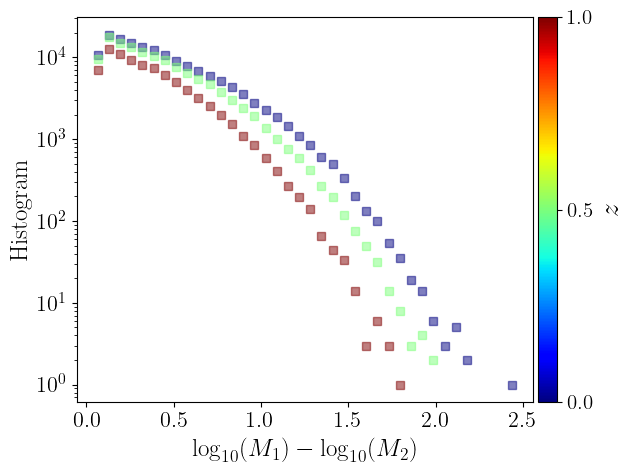

In [91]:
from colossus.lss import peaks
from colossus.cosmology import cosmology
cosmo_val_all = np.array([0.3175, 0.049, 0.6711, 0.9624, 0.834])
Om0 = cosmo_val_all[0]
Ob0 = cosmo_val_all[1]
h0 = cosmo_val_all[2]
ns = cosmo_val_all[3]
sigma8 = cosmo_val_all[4]
params = {'flat': True, 'H0': h0*100, 'Om0': Om0, 'Ob0': Ob0, 'sigma8': sigma8, 'ns': ns}
cosmo = cosmology.setCosmology('myCosmo', **params)


bin_cents_M = np.linspace(0.0, 2.5, 40)[1:-1]
# bin_cents_nu = np.linspace(0.0, 2.0, 40)[1:-1]
bin_edges_M = 0.5*(bin_cents_M[1:] + bin_cents_M[:-1])
delta_b = 0.5*(bin_cents_M[1] - bin_cents_M[0])
bin_edges_M = np.insert(bin_edges_M,0, bin_edges_M[0] - delta_b)
bin_edges_M = np.insert(bin_edges_M,len(bin_edges_M), bin_edges_M[-1] + delta_b)

import matplotlib
fig, axes = pl.subplots(1,1, figsize=(7,5))
from matplotlib import cm
norm = matplotlib.colors.Normalize(vmin=0.0, vmax=1.0)

for jz in range(len(z_snap_sel)):
    # z = np.round(z_snap_sel[jz], 4)
    z = z_snap_sel[jz]
    # z_REDSHIFT = str(z)
    # saved_jz = saved_all_snaps[z_REDSHIFT]

    Nhalos = Nhalos_snap_sel_dict[z]
    indsel = np.where(Nhalos > 1)

    M_halos_0 = Mhalos_snap_sel_dict[z][...,0][indsel]
    nu_halos_0 = nu_snap_sel_dict[z][...,0][indsel]

    M_halos_1 = Mhalos_snap_sel_dict[z][...,1][indsel]
    nu_halos_1 = nu_snap_sel_dict[z][...,1][indsel]

    M_halos_diff = M_halos_0 - M_halos_1
    
    z_jz = z_snap_sel[jz]
    color_ji = cm.jet(norm(z_jz)) 

    hist_truth, _ = np.histogram(M_halos_diff, bins=bin_edges_M)
    # mass_from_nu = peaks.massFromPeakHeight(bin_cents_nu, z)
    # hist_mock, _ = np.histogram(lgMass_mock, bins=bin_edges_M)
    # pl.plot(bin_cents_M, hist_mock/hist_truth, color=color_ji, alpha=0.5)
    pl.plot(bin_cents_M, hist_truth, color=color_ji, ls='', marker='s', alpha=0.5)
    # pl.plot(bin_cents_M, hist_mock, color=color_ji, ls = '-', alpha=0.5)

# pl.ylim(0.6, 1.4)
pl.yscale('log')
cbar = fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cm.jet), ax=axes, label=r'$z$', pad=0.01)
# set labelsize and colorbar location:
# cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=15)
# cbar.set_label(r'$\sigma_8$', size=18)
cbar.set_label(r'$z$', size=20)
cbar.set_ticks(np.arange(0.0, 1.01, 0.5))
# pl.xlabel(r'$\log_{10}(M_{\rm halo}/M_{\odot})$', fontsize=18)
pl.xlabel(r'$\log_{10}(M_1) - \log_{10}(M_2)$', fontsize=18)
# pl.ylabel(r'$f(M_0)$', fontsize=18)
pl.ylabel(r'Histogram', fontsize=18)
# pl.axhline(1, color='k', ls='--')
pl.tick_params(axis='both', which='major', labelsize=16)
pl.tick_params(axis='both', which='minor', labelsize=16)





In [57]:
jsim_all = np.arange(10).astype(int)
nu_snap_sel_dict = {}
Nhalos_snap_sel_dict = {}
Mhalos_snap_sel_dict = {}
for jsim in (jsim_all):
    ldir = f'/mnt/home/spandey/ceph/Quijote/data_NGP_self_LH/{jsim}/'
    mass_def = 'vir'
    df_LHj_fname = ldir + f'SPARSEMATS_halos_HR_rockstar_{mass_def}_lgMmincut_5e12_full_res_128_z=0.5.pk'
    # df_z0p5_fname = ldir + f'SPARSEMATS_halos_HR_rockstar_{mass_def}_lgMmincut_5e12_full_res_128_z=0.5.pk'
    # df_z1_fname = ldir + f'SPARSEMATS_halos_HR_rockstar_{mass_def}_lgMmincut_5e12_full_res_128_z=0.5.pk'

    df_LHj = dill.load(open(df_LHj_fname, 'rb'))
    # df_z0p5 = dill.load(open(df_z0p5_fname, 'rb'))
    # df_z1 = dill.load(open(df_z1_fname, 'rb'))

    Nhalos_z0 = df_LHj['N_halos_combined'].todense()
    M_halos_z0 = df_LHj['M_halos_combined'].todense()
    nu_halos_z0 = df_LHj['nu_halos_combined'].todense()

    nu_snap_sel_dict[jsim] = nu_halos_z0
    Nhalos_snap_sel_dict[jsim] = Nhalos_z0
    Mhalos_snap_sel_dict[jsim] = M_halos_z0

    


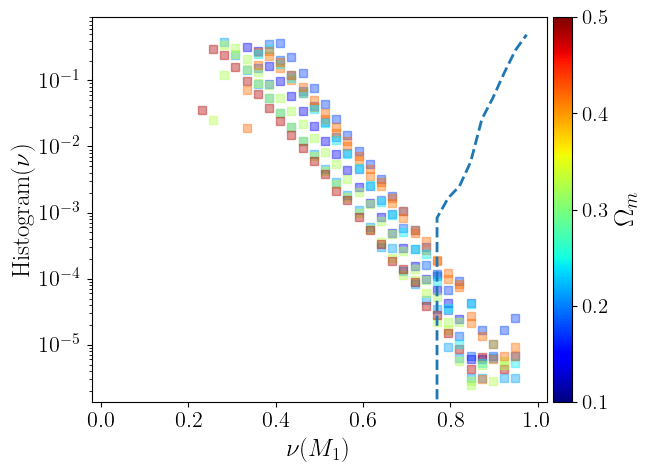

In [60]:
from colossus.lss import peaks
from colossus.cosmology import cosmology
cosmo_val_all = np.array([0.3175, 0.049, 0.6711, 0.9624, 0.834])
Om0 = cosmo_val_all[0]
Ob0 = cosmo_val_all[1]
h0 = cosmo_val_all[2]
ns = cosmo_val_all[3]
sigma8 = cosmo_val_all[4]
params = {'flat': True, 'H0': h0*100, 'Om0': Om0, 'Ob0': Ob0, 'sigma8': sigma8, 'ns': ns}
cosmo = cosmology.setCosmology('myCosmo', **params)

numax = 5.0
# bin_cents_nu = np.linspace(1.0, 6.0, 40)[1:-1]
bin_cents_nu = np.linspace(0.0, 1.0, 40)[1:-1]
# bin_cents_nu = np.linspace(0.0, 2.0, 40)[1:-1]
bin_edges_nu = 0.5*(bin_cents_nu[1:] + bin_cents_nu[:-1])
delta_b = 0.5*(bin_cents_nu[1] - bin_cents_nu[0])
bin_edges_nu = np.insert(bin_edges_nu,0, bin_cents_nu[0] - delta_b)
bin_edges_nu = np.insert(bin_edges_nu,len(bin_edges_nu), bin_cents_nu[-1] + delta_b)

LH_cosmo_val_file='/mnt/home/spandey/ceph/Quijote/latin_hypercube_params.txt'

mu, beta = 1.4, 0.234
rs = np.random.gumbel(mu, beta, 400000)

hist_rand, _ = np.histogram(rs, bins=bin_edges_nu)
hist_rand = hist_rand/np.sum(hist_rand)

zinference = 0.5

import matplotlib
fig, axes = pl.subplots(1,1, figsize=(7,5))
from matplotlib import cm
norm = matplotlib.colors.Normalize(vmin=0.1, vmax=0.5)

# for jsim in (jsim_all[1::2]):
for jsim in (jsim_all):    
    # z = np.round(z_snap_sel[jz], 4)
    # z = z_snap_sel[jz]
    # z_REDSHIFT = str(z)
    # saved_jz = saved_all_snaps[z_REDSHIFT]
    cosmo_val_all = np.loadtxt(LH_cosmo_val_file)[jsim]
    Om0 = cosmo_val_all[0]
    Ob0 = cosmo_val_all[1]
    h0 = cosmo_val_all[2]
    ns = cosmo_val_all[3]
    sigma8 = cosmo_val_all[4]
    params = {'flat': True, 'H0': h0*100, 'Om0': Om0, 'Ob0': Ob0, 'sigma8': sigma8, 'ns': ns}
    cosmo = cosmology.setCosmology('myCosmo', **params)
    Dz = cosmo.growthFactor(zinference)

    cosmo_val_all = np.loadtxt(LH_cosmo_val_file)[jsim]
    Om0 = cosmo_val_all[0]


    Nhalos = Nhalos_snap_sel_dict[jsim]
    M_halos = Mhalos_snap_sel_dict[jsim][...,0]
    nu_halos = nu_snap_sel_dict[jsim][...,0]

    M_halos_all_nonzero = M_halos[M_halos > 0]
    nu_all_nonzero = nu_halos[M_halos > 0]/numax
    
    # z_jz = z_snap_sel[jz]
    color_ji = cm.jet(norm(Om0)) 

    hist_truth, _ = np.histogram(nu_all_nonzero, bins=bin_edges_nu)
    # mass_from_nu = peaks.massFromPeakHeight(bin_cents_nu, zinference)
    hist_truth = hist_truth/np.sum(hist_truth)
    # hist_mock, _ = np.histogram(lgMass_mock, bins=bin_edges_M)
    # pl.plot(bin_cents_M, hist_mock/hist_truth, color=color_ji, alpha=0.5)
    # pl.plot(bin_cents_nu, mass_from_nu*hist_truth, color=color_ji, ls='', marker='s', alpha=0.5)
    pl.plot(bin_cents_nu, hist_truth, color=color_ji, ls='', marker='s', alpha=0.4)
    # pl.plot(bin_cents_M, hist_mock, color=color_ji, ls = '-', alpha=0.5)

pl.plot(bin_cents_nu, hist_rand, ls='--', lw=2.0, label='Gumbel')
# pl.plot(nu_array_theory+0.2, hmf_nu_theory, label='Colossus2')
# pl.plot(nu_array_theory+0.5, hmf_nu_theory, label='Colossus3')
# pl.ylim(0.6, 1.4)
pl.yscale('log')
cbar = fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cm.jet), ax=axes, label=r'$z$', pad=0.01)
# set labelsize and colorbar location:
# cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=15)
# cbar.set_label(r'$\sigma_8$', size=18)
cbar.set_label(r'$\Omega_{m}$', size=20)
# cbar.set_ticks(np.arange(0.0, 1.01, 0.5))
cbar.set_ticks(np.arange(0.1, 0.51, 0.1))
# pl.xlabel(r'$\log_{10}(M_{\rm halo}/M_{\odot})$', fontsize=18)
pl.xlabel(r'$\nu(M_1)$', fontsize=18)
# pl.ylabel(r'$M_1(\nu)$ $\times$ $f_1(\nu)$', fontsize=18)
# pl.ylabel(r'$M(\nu)$ $\times$ Histogram$(\nu)$', fontsize=18)
pl.ylabel(r'Histogram$(\nu)$', fontsize=18)
# pl.axhline(1, color='k', ls='--')
pl.tick_params(axis='both', which='major', labelsize=16)
pl.tick_params(axis='both', which='minor', labelsize=16)





In [145]:
# cosmo.growthFactor(1.0)


array(0.57775891)

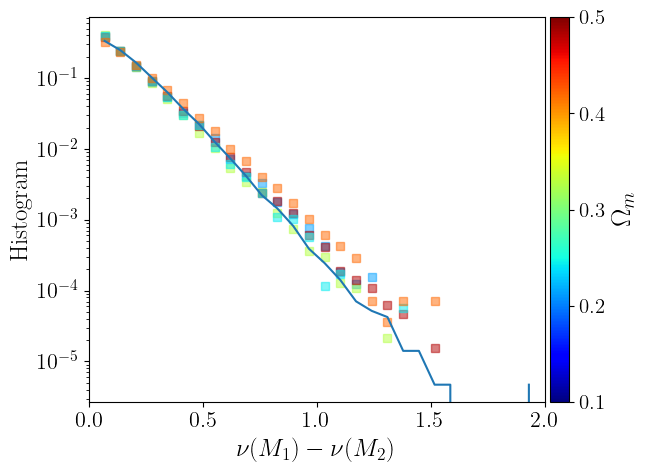

In [112]:
from colossus.lss import peaks
from colossus.cosmology import cosmology
cosmo_val_all = np.array([0.3175, 0.049, 0.6711, 0.9624, 0.834])
Om0 = cosmo_val_all[0]
Ob0 = cosmo_val_all[1]
h0 = cosmo_val_all[2]
ns = cosmo_val_all[3]
sigma8 = cosmo_val_all[4]
params = {'flat': True, 'H0': h0*100, 'Om0': Om0, 'Ob0': Ob0, 'sigma8': sigma8, 'ns': ns}
cosmo = cosmology.setCosmology('myCosmo', **params)


bin_cents_nu = np.linspace(0.0, 2.0, 30)[1:-1]
# bin_cents_nu = np.linspace(0.0, 2.0, 40)[1:-1]
bin_edges_nu = 0.5*(bin_cents_nu[1:] + bin_cents_nu[:-1])
delta_b = 0.5*(bin_cents_nu[1] - bin_cents_nu[0])
bin_edges_nu = np.insert(bin_edges_nu,0, bin_cents_nu[0] - delta_b)
bin_edges_nu = np.insert(bin_edges_nu,len(bin_edges_nu), bin_cents_nu[-1] + delta_b)

mu, beta = 0, 0.125
rs = np.random.gumbel(mu, beta, 400000)

hist_rand, _ = np.histogram(rs, bins=bin_edges_nu)
hist_rand = hist_rand/np.sum(hist_rand)


import matplotlib
fig, axes = pl.subplots(1,1, figsize=(7,5))
from matplotlib import cm
norm = matplotlib.colors.Normalize(vmin=0.1, vmax=0.5)

for jsim in (jsim_all[1::2]):
    # z = np.round(z_snap_sel[jz], 4)
    # z = z_snap_sel[jz]
    # z_REDSHIFT = str(z)
    # saved_jz = saved_all_snaps[z_REDSHIFT]

    cosmo_val_all = np.loadtxt(LH_cosmo_val_file)[jsim]
    Om0 = cosmo_val_all[0]


    Nhalos = Nhalos_snap_sel_dict[jsim]
    # M_halos = Mhalos_snap_sel_dict[jsim][...,0]
    # nu_halos = nu_snap_sel_dict[jsim][...,0]

    # Nhalos = Nhalos_snap_sel_dict[z]
    indsel = np.where(Nhalos > 2)

    M_halos_0 = Mhalos_snap_sel_dict[jsim][...,1][indsel]
    nu_halos_0 = nu_snap_sel_dict[jsim][...,1][indsel]

    M_halos_1 = Mhalos_snap_sel_dict[jsim][...,2][indsel]
    nu_halos_1 = nu_snap_sel_dict[jsim][...,2][indsel]

    nu_halos_diff = nu_halos_0 - nu_halos_1

    # M_halos_all_nonzero = M_halos[M_halos > 0]
    # nu_all_nonzero = nu_halos[M_halos > 0]
    
    # z_jz = z_snap_sel[jz]
    # color_ji = cm.jet(norm(z_jz)) 
    color_ji = cm.jet(norm(Om0)) 

    hist_truth, _ = np.histogram(nu_halos_diff, bins=bin_edges_nu)
    hist_truth = hist_truth/np.sum(hist_truth)
    # mass_from_nu = peaks.massFromPeakHeight(bin_cents_nu, z)
    # hist_mock, _ = np.histogram(lgMass_mock, bins=bin_edges_M)
    # pl.plot(bin_cents_M, hist_mock/hist_truth, color=color_ji, alpha=0.5)
    # pl.plot(bin_cents_nu, mass_from_nu*hist_truth, color=color_ji, ls='', marker='s', alpha=0.5)
    pl.plot(bin_cents_nu, hist_truth, color=color_ji, ls='', marker='s', alpha=0.5)    
    # pl.plot(bin_cents_M, hist_mock, color=color_ji, ls = '-', alpha=0.5)
# pl.plot(nu_array_theory-1.2, hmf_nu_theory, label='Colossus1')
pl.plot(bin_cents_nu, hist_rand, label='Gumbel')
# pl.ylim(0.6, 1.4)
pl.yscale('log')
pl.xlim(0, 2)
cbar = fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cm.jet), ax=axes, label=r'$z$', pad=0.01)
# set labelsize and colorbar location:
# cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=15)
# cbar.set_label(r'$\sigma_8$', size=18)
cbar.set_label(r'$\Omega_m$', size=20)
# cbar.set_ticks(np.arange(0.0, 1.01, 0.5))
cbar.set_ticks(np.arange(0.1, 0.51, 0.1))
# pl.xlabel(r'$\log_{10}(M_{\rm halo}/M_{\odot})$', fontsize=18)
# pl.xlabel(r'$\nu$', fontsize=18)
pl.xlabel(r'$\nu(M_1) - \nu(M_2)$', fontsize=18)
# pl.ylabel(r'$f(\nu(M_1) - \nu(M_2))$', fontsize=18)
# pl.ylabel(r'$f(\nu(M_1) - \nu(M_2))$', fontsize=18)
pl.ylabel(r'Histogram', fontsize=18)
# pl.axhline(1, color='k', ls='--')
pl.tick_params(axis='both', which='major', labelsize=16)
pl.tick_params(axis='both', which='minor', labelsize=16)





In [106]:
nu_halos_diff.shape


(93033,)